In [109]:
#define the function and rk4 methold
import numpy as np
import matplotlib.pyplot as plt

G=1.
M1=1
M2=1
tend=2*np.pi
h=0.1

x1=1
y1=0
vx1=0
vy1=0.1

x2=0.
y2=0.
vx2=0.
vy2=-0.1



#y[0]=x1, y[1]=v_{x1}, y[2]=y1, y[3]=v_{y1}
#y[4]=x2, y[5]=v_{x2}, y[6]=y2, y[7]=v_{y2}
def f(t, y):
    f=np.zeros(8)
    r=np.sqrt((y[0]-y[4])*(y[0]-y[4])+(y[2]-y[6])*(y[2]-y[6]))
    f[0]=y[1]
    f[1]=G*M2/r/r/r*(y[4]-y[0])
    f[2]=y[3]
    f[3]=G*M2/r/r/r*(y[6]-y[2])
    
    f[4]=y[5]
    f[5]=G*M1/r/r/r*(y[0]-y[4])
    f[6]=y[7]
    f[7]=G*M1/r/r/r*(y[2]-y[6])
    return f

def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)        
    k4=h*f(t+h,y+k3)                
    y+= (1./6.)*(k1+2*k2+2*k3+k4)  
    return y

eps= 0.4999023378329511
vy1=-vy2= 0.500048828125


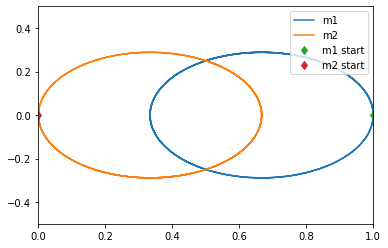

In [110]:
#find the initial velocity leading to ellipticity equals 0.5
vy1_min=0.2
vy1_max=0.7

Nmax=50
for i in range(Nmax):
    t=0
    x1p=[]
    y1p=[]
    x2p=[]
    y2p=[]
    
    vy1=(vy1_min+vy1_max)/2.
    vy2=-vy1
    y=[x1,vx1,y1,vy1,x2,vx2,y2,vy2]

    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = rk4(t,h,y,8)
        x1p=np.append(x1p,y[0])
        y1p=np.append(y1p,y[2])
        x2p=np.append(x2p,y[4])
        y2p=np.append(y2p,y[6])
        t = t+h
    a_squa=((max(x1p)-min(x1p))/2)**2
    b_squa=((max(y1p)-min(y1p))/2)**2
    eps=np.sqrt((a_squa-b_squa)/a_squa)
    if eps-0.5<0:
        vy1_max=vy1
    else:
        vy1_min=vy1
        
    if np.abs(eps-0.5)<1e-4:
        print('eps=',eps)
        print('vy1=-vy2=',vy1)
        break

plt.plot(x1p,y1p,label='m1')
plt.plot(x2p,y2p,label='m2')
plt.plot(x1p[0],y1p[0],'d',label='m1 start')
plt.plot(x2p[0],y2p[0],'d',label='m2 start')
plt.axis([0,1,-0.5,0.5])
plt.legend(loc='upper right')
plt.show()

period is 2.4179999999999553


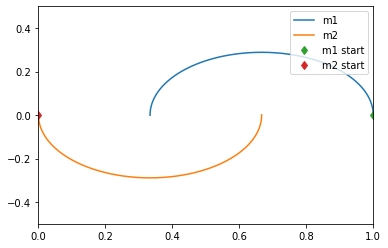

In [111]:
#calculate the orbiting period
t=0
tend=2*np.pi
h=0.001
x1p=[]
y1p=[]
x2p=[]
y2p=[]
    
y=[x1,vx1,y1,vy1,x2,vx2,y2,vy2]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,8)
    x1p=np.append(x1p,y[0])
    y1p=np.append(y1p,y[2])
    x2p=np.append(x2p,y[4])
    y2p=np.append(y2p,y[6])
    if len(x1p)>1:
        if x1p[-1]>x1p[-2]:
            P = 2*t
            print('period is',2*t)
            break
    t = t+h 
plt.plot(x1p,y1p,label='m1')
plt.plot(x2p,y2p,label='m2')
plt.plot(x1p[0],y1p[0],'d',label='m1 start')
plt.plot(x2p[0],y2p[0],'d',label='m2 start')
plt.axis([0,1,-0.5,0.5])
plt.legend(loc='upper right')
plt.show()

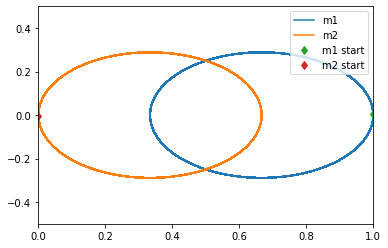

In [108]:
#evolve 100 orbits
t=0
tend=P*100
h=0.01
x1p=[]
y1p=[]
x2p=[]
y2p=[]
    
y=[x1,vx1,y1,vy1,x2,vx2,y2,vy2]

while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,8)
    x1p=np.append(x1p,y[0])
    y1p=np.append(y1p,y[2])
    x2p=np.append(x2p,y[4])
    y2p=np.append(y2p,y[6])
    t = t+h 
plt.plot(x1p,y1p,label='m1')
plt.plot(x2p,y2p,label='m2')
plt.plot(x1p[0],y1p[0],'d',label='m1 start')
plt.plot(x2p[0],y2p[0],'d',label='m2 start')
plt.axis([0,1,-0.5,0.5])
plt.legend(loc='upper right')
plt.show()